In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [5]:
# Пример данных
diagnoses = np.array(['Грипп', 'Простуда', 'Пневмония', 'Тонзиллит',
                      'Аллергия', 'Гастрит', 'Ротавирус', 'Ковид-19',
                      'Синусит', 'Бронхит', 'Скарлатина', 'Менингит',
                      'Миозит', 'Астма', 'Ринит', 'Гастроэнтерит', 'ОРВИ',
                      'Краснуха', 'Энцефалит', 'Анорексия', 'Герпес', 'Аритмия',
                      'Гайморит', 'Панкреатит', 'Эпилепсия', 'Гипертония', 'Стенокардия',
                      'Анемия', 'Мигрень', 'Ветряная оспа', 'Инфаркт', 'Гипогликемия', 'Псориаз',
                      'Язва желудка', 'Холецистит', 'Плеврит', 'Дискинезия', 'Демодекоз', 'Сепсис',
                      'Гипотиреоз', 'Отит', 'Депрессия', 'Тромбоз', 'Гастроэзофагеальная рефлюксная болезнь',
                        'Пиелонефрит', 'Гепатит', 'Конъюнктивит', 'Ларингит'])
symptoms = np.array([['Кашель', 'Лихорадка', 'Головная боль'],
                     ['Насморк', 'Кашель', 'Боль в горле'],
                     ['Лихорадка', 'Кашель', 'Одышка'],
                     ['Боль в горле', 'Озноб', 'Слабость'],
                     ['Насморк', 'Головная боль', 'Чихание'],
                     ['Тошнота', 'Рвота', 'Усталость'],
                     ['Диарея', 'Боль в мышцах', 'Потливость'],
                     ['Одышка', 'Слабость', 'Потеря вкуса'],
                       ['Заложенность носа', 'Потеря обоняния', 'Чихание'],
                         ['Кашель', 'Слабость', 'Потеря аппетита'],
                         ['Сыпь', 'Потливость', 'Озноб'], ['Лихорадка', 'Тошнота', 'Слабость'],
                           ['Головная боль', 'Слабость', 'Боль в мышцах'], ['Кашель', 'Одышка', 'Слабость'],
                             ['Насморк', 'Потливость', 'Боль в горле'], ['Тошнота', 'Рвота', 'Диарея'],
                             ['Лихорадка', 'Чихание', 'Заложенность носа'],
                             ['Боль в горле', 'Сыпь', 'Потеря обоняния'],
                             ['Головная боль', 'Тошнота', 'Потеря вкуса'],
                               ['Кашель', 'Озноб', 'Потеря аппетита'],
 ['Сухость во рту', 'Головная боль', 'Зуд'], ['Боль в груди', 'Учащенное сердцебиение', 'Одышка'],
 ['Заложенность носа', 'Головокружение', 'Усталость'], ['Снижение веса', 'Тошнота', 'Боль в животе'],
 ['Слабость', 'Судороги', 'Головная боль'], ['Кашель', 'Лихорадка', 'Повышенная температура'],
 ['Одышка', 'Учащенное сердцебиение', 'Сухость во рту'],
 ['Головная боль', 'Зуд', 'Потливость'],
 ['Тошнота', 'Потеря аппетита', 'Боль в животе'],
 ['Диарея', 'Озноб', 'Усталость'],
 ['Кашель', 'Боль в груди', 'Потеря вкуса'], ['Лихорадка', 'Боль в горле', 'Одышка'],
   ['Сухость во рту', 'Слабость', 'Зуд'], ['Головная боль', 'Снижение веса', 'Тошнота'],
   ['Одышка', 'Боль в груди', 'Учащенное сердцебиение'], ['Заложенность носа', 'Головная боль', 'Сухость во рту'],
   ['Головокружение', 'Потеря вкуса', 'Боль в мышцах'], ['Тошнота', 'Судороги', 'Слабость'], ['Боль в животе', 'Диарея', 'Озноб'],
   ['Зуд', 'Покраснение глаз', 'Потливость'], ['Повышенная температура', 'Лихорадка', 'Головная боль'],
   ['Сыпь', 'Потливость', 'Зуд'], ['Головокружение', 'Потеря аппетита', 'Снижение веса'],
   ['Боль в горле', 'Судороги', 'Головная боль'], ['Заложенность носа', 'Сухость во рту', 'Головная боль'],
   ['Озноб', 'Сыпь', 'Тошнота'], ['Потливость', 'Снижение веса', 'Покраснение глаз'],
   ['Головокружение', 'Боль в мышцах', 'Заложенность носа']])


In [17]:
# Кодируем диагнозы
label_encoder_diagnoses = LabelEncoder()
encoded_diagnoses = label_encoder_diagnoses.fit_transform(diagnoses)

# Кодируем симптомы
# Создаем словарь для соответствия симптомов с номерами
all_symptoms = set(symptom for sublist in symptoms for symptom in sublist)
label_encoder_symptoms = LabelEncoder()
label_encoder_symptoms.fit(list(all_symptoms))

# Преобразуем симптомы в числовые значения
encoded_symptoms = [label_encoder_symptoms.transform(s) for s in symptoms]

# Для обучения модели необходимо создать матрицу признаков
# Мы используем one-hot encoding для представления симптомов
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
X = mlb.fit_transform(symptoms)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, encoded_diagnoses, test_size=0.2, random_state=42)

# Создаем и обучаем модель
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
history = model.fit(X_train, y_train)

# Оцениваем модель
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Тестовая точность: {accuracy}')

Тестовая точность: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
# предиктус
sample_symptoms = [['Рвота', 'Кашель', 'Боль в горле', 'Насморк']]
encoded_sample_symptoms = mlb.transform(sample_symptoms)
predicted_diagnosis = model.predict(encoded_sample_symptoms)
predicted_diagnosis_label = label_encoder_diagnoses.inverse_transform(predicted_diagnosis)

print(f'Предсказанный диагноз: {predicted_diagnosis_label[0]}')

Предсказанный диагноз: Простуда


In [21]:
index=np.where(diagnoses=="Простуда")[0][0]
print(index)
print(symptoms[index])

1
['Насморк' 'Кашель' 'Боль в горле']


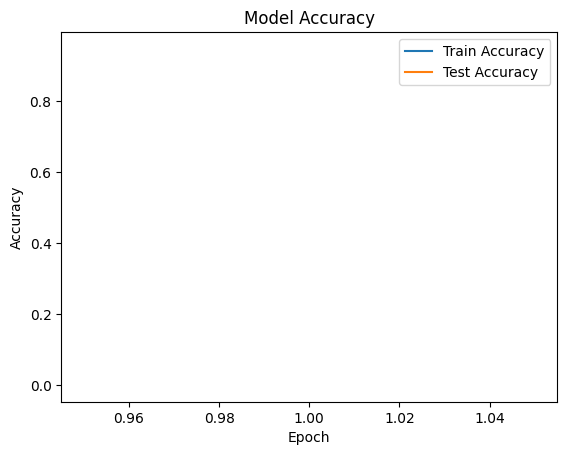

In [20]:
import matplotlib.pyplot as plt
# Оцениваем модель
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Вычисляем точность
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Визуализация точности
epochs = np.arange(1, 2)  # Поскольку мы не можем отслеживать каждую эпоху в MLPClassifier, просто создадим фиктивные данные
train_accuracies = [train_accuracy]
test_accuracies = [test_accuracy]

plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()